In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 38.6 MB/s eta 0:00:00


In [38]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

smile_dict = {
    'PSPCz': 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34',
    '4CzIPN': 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N',
    'DMAC1': 'CC1(C2=CC=CC=C2NC3=CC=CC=C31)C',
    'DMAC2': 'C1=CC=C2C(=C1)NC3=CC=CC=C3O2',
    'AZB1': 'B1=CC=NC=C1'
}

output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Liste des propriétés à extraire
properties = ['Nom_molecule', 'Poids_Mol','poids_mol_moy', 'LogP', 'TPSA','hbd','hba']

# Création d'un DataFrame vide
data = []

for key, smile in smile_dict.items():
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        # Calcul des descripteurs
        #poid_moleculaire
        molwt = Descriptors.MolWt(mol)
        #poid moleculaire moyen
        molwtE = Descriptors.ExactMolWt(mol)
        # solubilite
        logp = Descriptors.MolLogP(mol)
        #polarite
        tpsa = Descriptors.TPSA(mol)
        #nombre de liasons donneurs d'H
        hbd = Descriptors.NumHDonors(mol)
        #nombre de liason accepteurs d'H
        hba = Descriptors.NumHAcceptors(mol)

        # Ajout des propriétés à la liste de données
        data.append([key,molwt , molwtE, logp, tpsa,hbd,hba])
    else:
        print(f'Impossible de générer des descripteurs pour {key}. Le SMILES est invalide.')

# Création du DataFrame à partir des données
df = pd.DataFrame(data, columns=properties)
df.set_index('Nom_molecule', inplace=True)

# Affichage du DataFrame sous forme de tableau
print(df)

              Poids_Mol  poids_mol_moy      LogP   TPSA  hbd  hba
Nom_molecule                                                     
PSPCz           307.374     307.066700   4.15390  49.93    1    2
4CzIPN          788.914     788.268845  13.81836  67.30    0    6
DMAC1           209.292     209.120449   4.06950  12.03    1    1
DMAC2           183.210     183.068414   3.53590  21.26    1    2
AZB1             76.895      77.043680   0.41970  12.89    0    1


In [39]:
df.describe()

,Poids_Mol,poids_mol_moy,LogP,TPSA,hbd,hba
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,313.137000,312.913618,5.199472,32.682000,0.600000,2.400000
std,278.330764,278.057640,5.056406,24.721397,0.547723,2.073644
min,76.895000,77.043680,0.419700,12.030000,0.000000,1.000000
25%,183.210000,183.068414,3.535900,12.890000,0.000000,1.000000
50%,209.292000,209.120449,4.069500,21.260000,1.000000,2.000000
75%,307.374000,307.066700,4.153900,49.930000,1.000000,2.000000
max,788.914000,788.268845,13.818360,67.300000,1.000000,6.000000


In [40]:
df.head()

,Poids_Mol,poids_mol_moy,LogP,TPSA,hbd,hba
Nom_molecule,,,,,,
PSPCz,307.374,307.066700,4.15390,49.93,1,2
4CzIPN,788.914,788.268845,13.81836,67.30,0,6
DMAC1,209.292,209.120449,4.06950,12.03,1,1
DMAC2,183.210,183.068414,3.53590,21.26,1,2
AZB1,76.895,77.043680,0.41970,12.89,0,1


<Axes: >

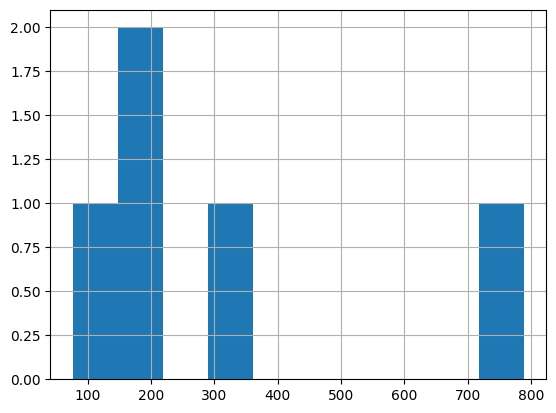

In [41]:
df['Poids_Mol'].hist()

<Axes: xlabel='Nom_molecule'>

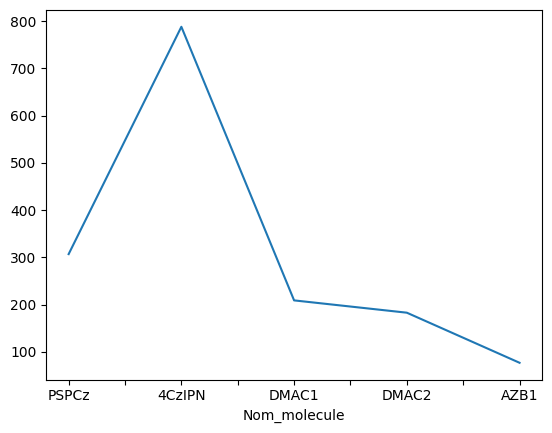

In [42]:
df['poids_mol_moy'].plot()

In [43]:
df['LogP'].mean()

5.199471999999996

In [44]:
df['TPSA'].value_counts()

49.93    1
67.30    1
12.03    1
21.26    1
12.89    1
Name: TPSA, dtype: int64

In [45]:
df[df['hbd']<5]['hba'].value_counts()

2    2
1    2
6    1
Name: hba, dtype: int64